<a href="https://colab.research.google.com/github/akpanitorobong/7135CEM-Modelling_and_Optimization_Under_Uncertainty/blob/main/7135CEM_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports, Dataset Loading and Preprocessing**

**Necessary Imports**

In [19]:
print("Importing necessary libraries...")
!pip install ucimlrepo

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

from ucimlrepo import fetch_ucirepo # For dataset import
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding categorical variables
from sklearn.ensemble import RandomForestClassifier  # Random Forest model for classification
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for baseline comparison
from sklearn.gaussian_process import GaussianProcessClassifier  # Gaussian Process Classification model
from sklearn.gaussian_process.kernels import RBF, Matern  # RBF and Matérn kernels for Gaussian Process
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix  # Evaluation metrics
print("Libraries imported successfully.")
#Dataset balancing
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

Importing necessary libraries...
Libraries imported successfully.


**Load Dataset**

In [14]:
print("Loading dataset...")
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
df = pd.concat([X, y], axis=1)
df.to_csv('diabetes_health_indicators.csv', index=False)
print("Dataset loaded successfully.")
df.head()

Loading dataset...
Dataset loaded successfully.


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


**Preprocessing**

In [17]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nDuplicate rows removed.")
print("\nDuplicate rows:")
print(df.duplicated().sum())

# Feature scaling using StandardScaler to normalize data
scaler = StandardScaler()
features = df.drop(columns=['Diabetes_binary'])  # Input features
target = df['Diabetes_binary']  # Target variable
X_scaled = scaler.fit_transform(features)  # Apply scaling to features
print("\nFeatures scaled successfully.")

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
print("\nDataset split successfully.")

Missing values:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Duplicate rows:
0

Duplicate rows removed.

Duplicate rows:
0

Features scaled successfully.

Dataset split successfully.


# **Exploratory Data Analysis, Dataset Balancing and Splitting**

**EDA**

Visualizing data distribution...


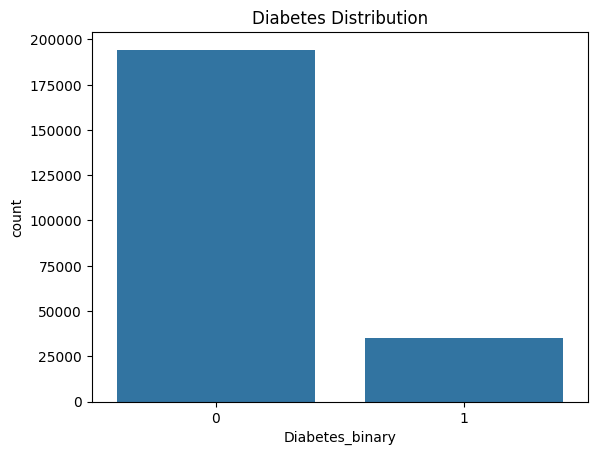

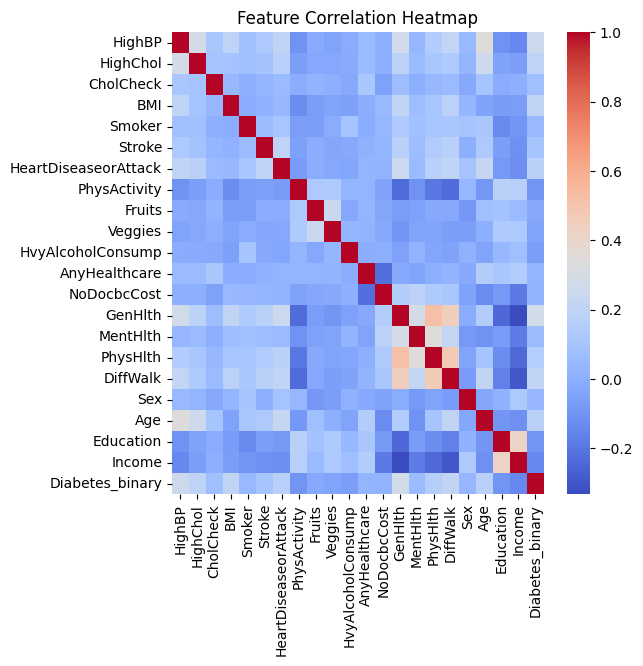

In [21]:
print("Visualizing data distribution...")
#Countplot for Target Variable
sns.countplot(x=target)
plt.title("Diabetes Distribution")
plt.show()

# Generate correlation heatmap to check relationships between features
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Scaling, Balancing(Undersampling) and Splitting**

In [27]:
# Feature scaling using StandardScaler to normalize data
scaler = StandardScaler()
features = df.drop(columns=['Diabetes_binary'])  # Input features
target = df['Diabetes_binary']  # Target variable
X_scaled = scaler.fit_transform(features)  # Apply scaling to features
print("Features scaled successfully.")

# Handling class imbalance using Random Under-Sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_scaled, target)
print("\nClass imbalance handled successfully. \nNew class distribution is %s", Counter(y_resampled))

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("\nDataset split successfully.")

Features scaled successfully.

Class imbalance handled successfully. 
New class distribution is %s Counter({0: 35097, 1: 35097})

Dataset split successfully.


# **Models**

**Model Selection and Implementation**

In [28]:
print("Training models...")
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gaussian Process Classifier (RBF)": GaussianProcessClassifier(kernel=RBF()),
    "Gaussian Process Classifier (Matern)": GaussianProcessClassifier(kernel=Matern()),
}

Training models...
